<a href="https://colab.research.google.com/github/stevengiacalone/Python-workshop/blob/main/Session_6_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration

In today's session, we'll be discussing numerical integration. As the name implies, this is a technique that is used to solve for (definite) integrals *numerically* (as opposed to *analytically*). This technique is most useful in situations where the integral *cannot* be solved analytically. We'll explore some examples of these cases below. But first, let's go over the basics.

## The Euler Method

The [Euler method](https://en.wikipedia.org/wiki/Euler_method) is a first-order procedure for solving ordinary differential equations with some initial value. It is the simplest method of numerical integration, first proposed by [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) in the 1700s. Simply put, the method takes ODEs like this

$$ \frac{dy}{dx} = y^\prime $$

and posits that $y$ at any given step $n+1$ can be written as

$$ y_{n+1} = y_n + h y^\prime_n $$

where $h$ is the step size.

Let's try this out on the simple physics problem of throwing a ball. We will assume that the ball moves with some initial speed $\dot{x} = 10$ cm/s in the $x$ direction and some initial speed $\dot{y} = 10$ cm/s in the $y$ direction. We will assume a constant speed in the $x$ direction and an acceleration in the $y$ direction caused by gravity. With each iteration, we will solve the following three equations:

$$ x_{n+1} = x_n + \dot{x} \, dt $$
$$ y_{n+1} = y_n + \dot{y} \, dt $$
$$ \dot{y}_{n+1} = \dot{y}_n + g \, dt $$

In [192]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
# set initial conditions
x = 0 # cm
xdot = 10 # cm/s
y = 0 # cm
ydot = 10 # cm/s
g = -98.1 # cm/s^2

# set timestep and max number of steps
dt = 0.001 # s
N = 1000

# record x and y position after each step
x_pos = np.zeros(N)
y_pos = np.zeros(N)

t = 0
for i in range(N-1):

    # update x
    x = x + xdot * dt
    x_pos[i+1] = x

    # update y
    y = y + ydot * dt
    y_pos[i+1] = y

    # update v_y
    ydot = ydot + g * dt

    # update t (just for bookkeeping)
    t += dt

    if y <= 0:
        print("Simulation complete after", np.round(t, 3), "seconds.")
        break

# trim zeros from end of arrays
x_pos = np.trim_zeros(x_pos, "b")
y_pos = np.trim_zeros(y_pos, "b")

Simulation complete after 0.205 seconds.


Now let's plot the results along with the analytical solution. Solving for $x$ and $y$ the usual way gives us the following equations.

$$ x(t) = ∫ v_x(0) dt = \dot{x}(0)t$$

$$ \dot{y}(t) = \dot{y}(0) + g t $$

$$ y(t) = ∫ \dot{y}(t) dt = \dot{y}(t)t + g t^2 / 2$$

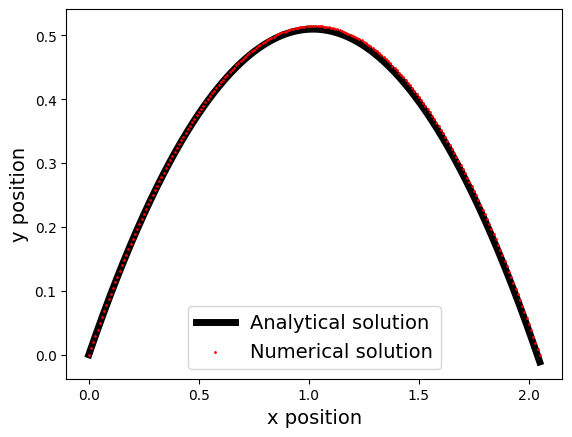

In [194]:
# plot the analytical solution
t_an = np.linspace(0,0.205,10000)
x_an = 10*t_an
y_an = 10*t_an + g*t_an**2 / 2
plt.plot(x_an, y_an, 'k-', lw=5, label="Analytical solution")

# overplot results of our numerical integration
plt.scatter(x_pos, y_pos, c='red', s=1, zorder=2, label="Numerical solution")

plt.xlabel("x position", fontsize=14)
plt.ylabel("y position", fontsize=14)
plt.legend(loc=8, fontsize=14)
plt.show()

The numerical solution is pretty close to the analytical solution! We can also animate the results of the simulation using matplotlib. See below for an example.

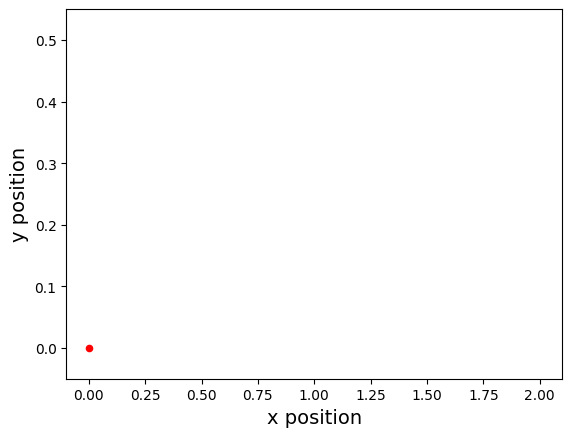

In [195]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

# Initialize the animation plot
fig = plt.figure()
ax = fig.add_subplot()

def frame(i):
    # clear previous version of plot
    ax.clear()
    # update ball location
    plot = plt.scatter([x_pos[i]], [y_pos[i]], c='red', s=20)
    # set the x and y limits and labels
    ax.set_xlim(-0.1, 2.1)
    ax.set_ylim(-0.05, 0.55)
    ax.set_xlabel("x position", fontsize=14)
    ax.set_ylabel("y position", fontsize=14)
    return plot

ani = animation.FuncAnimation(
    fig,                 # figure to show
    frame,               # function used to refresh plot
    frames=len(x_pos),   # number of frames (should be equal to size of dataa array)
    repeat=True,         # whether or not to loop animation
    interval=10          # time between frames (in ms)
                              )

ani

But note that this method isn't perfect! Let's see what happens when we increase the timestep.

Simulation complete after 0.22 seconds.


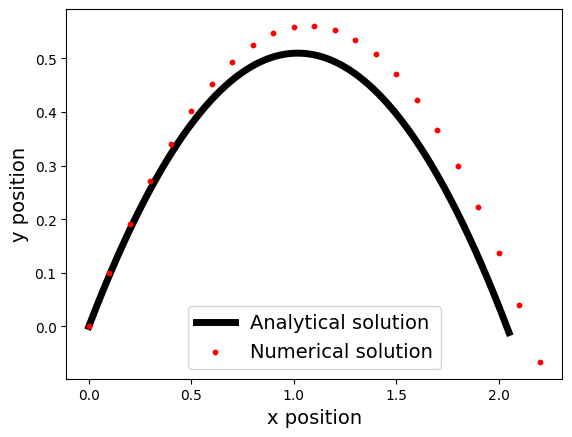

In [197]:
# set initial conditions
x = 0 # cm
xdot = 10 # cm/s
y = 0 # cm
ydot = 10 # cm/s
g = -98.1 # cm/s^2

# set timestep and max number of steps
dt = 0.01 # s
N = 1000

# record x and y position after each step
x_pos = np.zeros(N)
y_pos = np.zeros(N)

t = 0
for i in range(N-1):

    # update x
    x = x + xdot * dt
    x_pos[i+1] = x

    # update y
    y = y + ydot * dt
    y_pos[i+1] = y

    # update v_y
    ydot = ydot + g * dt

    # update t (just for bookkeeping)
    t += dt

    if y <= 0:
        print("Simulation complete after", np.round(t, 3), "seconds.")
        break

# trim zeros from end of arrays
x_pos = np.trim_zeros(x_pos, "b")
y_pos = np.trim_zeros(y_pos, "b")

# plot the analytical solution
t_an = np.linspace(0,0.205,10000)
x_an = 10*t_an
y_an = 10*t_an + g*t_an**2 / 2
plt.plot(x_an, y_an, 'k-', lw=5, label="Analytical solution")

# overplot results of our numerical integration
plt.scatter(x_pos, y_pos, c='red', s=10, zorder=2, label="Numerical solution")

plt.xlabel("x position", fontsize=14)
plt.ylabel("y position", fontsize=14)
plt.legend(loc=8, fontsize=14)
plt.show()

The accuracy of the numerical integration has decreased significantly! With Euler's method, the error of the calculation scales as $\sqrt{h}$. We can achieve more accurate calculations with larger step sizes using more advanced methods.

## The Runge-Kutta Methods

The Runge-Kutta (RK) methods are a family of numerical integration methods (which includes the Euther method described above). The most common RK method is known as fourth-order RK, or RK4. In RK4, the value of $y$ at $n+1$ is calculated with

$$ y_{n+1} = y_n + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) $$

where

$$ k_1 = y^\prime (x_n, y_n) $$
$$ k_2 = y^\prime (x_n + h/2, y_n + h k_1/2) $$
$$ k_3 = y^\prime (x_n + h/2, y_n + h k_2/2) $$
$$ k_4 = y^\prime (x_n + h, y_n + h k_3). $$

Note that the $y$ and $x$ here are just generic variables that do not correspond to those in the simulation above. This definition assumes $dy/dx = y^\prime (x, y)$.

Each of the $k$ terms above represents the slope of $y$ evaluated at four different points. By taking the weighted average of these points, RK4 delivers a more accurate solution for a given step size than the Euler method. If you want to see a derivation, the [wikipedia page](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge%E2%80%93Kutta_method) has a pretty good one.

Let's try the code block above again, but with RK4 instead of the Euler method.

Simulation complete after 0.21 seconds.


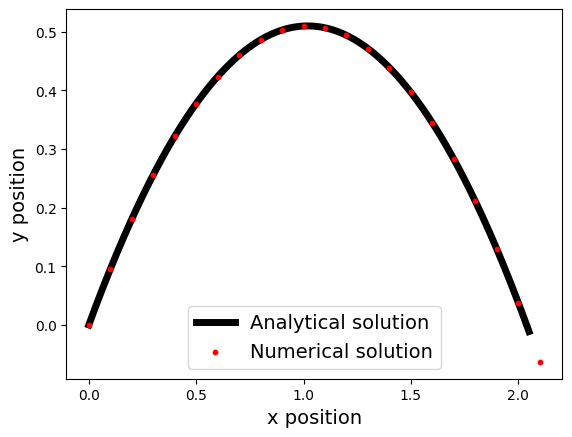

In [200]:
# set initial conditions
x = 0 # cm
xdot = 10 # cm/s
y = 0 # cm
ydot = 10 # cm/s
g = -98.1 # cm/s^2

# set timestep and max number of steps
dt = 0.01 # s
N = 1000

# record x and y position after each step
x_pos = np.zeros(N)
y_pos = np.zeros(N)

t = 0
for i in range(N-1):

    # update x (we can just use the Euler method for x, since there is no acceleration term)
    x = x + xdot * dt
    x_pos[i+1] = x

    # update y using RK4
    k1 = ydot + g * (t)
    k2 = ydot + g * (t + dt/2)
    k3 = ydot + g * (t + dt/2)
    k4 = ydot + g * (t + dt)
    y = y + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    y_pos[i+1] = y

    # update t (just for bookkeeping)
    t += dt

    if y <= 0:
        print("Simulation complete after", np.round(t, 3), "seconds.")
        break

# trim zeros from end of arrays
x_pos = np.trim_zeros(x_pos, "b")
y_pos = np.trim_zeros(y_pos, "b")

# plot the analytical solution
t_an = np.linspace(0,0.205,10000)
x_an = 10*t_an
y_an = 10*t_an + g*t_an**2 / 2
plt.plot(x_an, y_an, 'k-', lw=5, label="Analytical solution")

# overplot results of our numerical integration
plt.scatter(x_pos, y_pos, c='red', s=10, zorder=2, label="Numerical solution")

plt.xlabel("x position", fontsize=14)
plt.ylabel("y position", fontsize=14)
plt.legend(loc=8, fontsize=14)
plt.show()

## Exercise: The Two-Body Problem

Let's now explore the problem of two gravitationally bound objects. In this case, we'll work with the Earth-Sun system. First, we'll write out the relevant equations. The acceleration of the Earth ($m_2$) due to the Sun ($m_1$) is given by

$$ \vec{a_2} = \frac{G m_1}{r^2} \widehat{r} $$

and the acceleration of the Sun due to the Earth is given by

$$ \vec{a_1} = \frac{G m_2}{r^2} \widehat{r} .$$

Breaking these down into their vector components, the accelerations in the $x$ and $y$ directions are

$$ \ddot{x_1} = \frac{G m_2}{r^3} (x_2 - x_1) $$

$$ \ddot{y_1} = \frac{G m_2}{r^3} (y_2 - y_1) $$

$$ \ddot{x_2} = \frac{G m_1}{r^3} (x_1 - x_2) $$

$$ \ddot{y_2} = \frac{G m_1}{r^3} (y_1 - y_2) $$

where $r^2 = (x_2 - x_1)^2 + (y_2 - y_1)^2$. We'll just work in 2D and use the Euler method for now, to keep things simple. In the cell below, we'll integrate these equations to simulate the orbits of the system.

In [212]:
# define constants
G = 6.67e-8 # dyne cm^2 g^-2
AU = 1.5e13 # cm
m1 = 2e33 # g
m2 = 6e27 # g

# define initial state
x1 = 0     # cm
y1 = 0     # cm
x2 = 1*AU  # cm
y2 = 0     # cm

vx1 = 0   # cm/s
vy1 = -9  # cm/s
vx2 = 0   # cm/s
vy2 = 3e6 # cm/s

# define timestep and total number of steps
dt = 864 # 0.01 day in s
N = 100000

# define position arrays
x1_pos = np.zeros(N)
y1_pos = np.zeros(N)
x2_pos = np.zeros(N)
y2_pos = np.zeros(N)

x2_pos[0] = x2

for i in range(N-1):

    # calculate intantaneous accelerations
    r = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    ax1 = G*m2*(x2-x1)/r**3
    ay1 = G*m2*(y2-y1)/r**3
    ax2 = G*m1*(x1-x2)/r**3
    ay2 = G*m1*(y1-y2)/r**3

    # update positions x1, y1, x2, y2 and save to arrays
    x1 = x1 * vx1 * dt
    y1 = y1 + vy1 * dt
    x2 = x2 + vx2 * dt
    y2 = y2 + vy2 * dt

    x1_pos[i+1] = x1
    y1_pos[i+1] = y1
    x2_pos[i+1] = x2
    y2_pos[i+1] = y2

    # update speeds vx1, vy1, vx2, vy2
    vx1 = vx1 + ax1 * dt
    vy1 = vy1 + ay1 * dt
    vx2 = vx2 + ax2 * dt
    vy2 = vy2 + ay2 * dt

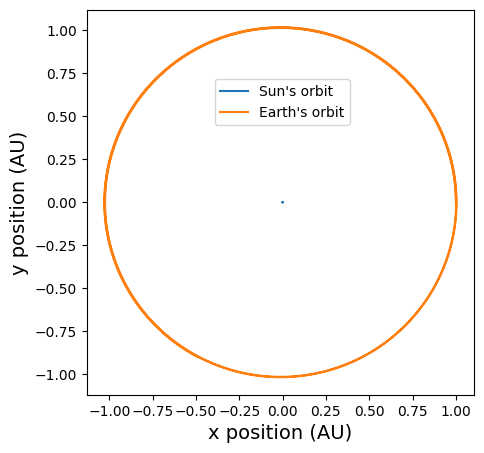

In [213]:
plt.figure(figsize=(5,5))
plt.plot(x1_pos/AU, y1_pos/AU, label="Sun's orbit")
plt.plot(x2_pos/AU, y2_pos/AU, label="Earth's orbit")
plt.xlabel("x position (AU)", fontsize=14)
plt.ylabel("y position (AU)", fontsize=14)
plt.legend(loc=(0.33,0.7))
plt.show()

The orbit of the Sun about the center of mass is that little dot in the center! Goes to show how much more massive the Sun is than the Earth.

## Exercise: The Three-Body Problem

The problem we solved above actually has an analytical solution (as was shown by Netwon). Let's not solve a problem that *doesn't* have an analytical solution and therefore must be solved numerically. The three-body problem has the same basic setup as before, but this time we add a third object. Now, our vectorized acceleration equations are as follow:

$$ \ddot{x_1} = \frac{G m_2}{r_{21}^3} (x_2 - x_1) + \frac{G m_3}{r_{31}^3} (x_3 - x_1) $$

$$ \ddot{y_1} = \frac{G m_2}{r_{21}^3} (y_2 - y_1) + \frac{G m_3}{r_{31}^3} (y_3 - y_1) $$

$$ \ddot{x_2} = \frac{G m_1}{r_{12}^3} (x_1 - x_2) + \frac{G m_3}{r_{32}^3} (x_3 - x_2) $$

$$ \ddot{y_2} = \frac{G m_1}{r_{12}^3} (y_1 - y_2) + \frac{G m_1}{r_{32}^3} (y_3 - y_2)$$

$$ \ddot{x_3} = \frac{G m_1}{r_{13}^3} (x_1 - x_3) + \frac{G m_3}{r_{23}^3} (x_2 - x_3) $$

$$ \ddot{y_3} = \frac{G m_1}{r_{13}^3} (y_1 - y_3) + \frac{G m_1}{r_{23}^3} (y_2 - y_3)$$

where $r_{12} = r_{21}$, $r_{32} = r_{23}$, and $r_{13} = r_{31}$.

We'll initialize our simulation with three Sun-like stars and some arbitrary orbital positions/speeds.

In [220]:
# define constants
G = 6.67e-8 # dyne cm^2 g^-2
AU = 1.5e13 # cm
m1 = m2 = m3 = 2e33 # g

# define initial state
x1 = 0     # cm
y1 = 0     # cm
x2 = 1*AU  # cm
y2 = 0     # cm
x3 = 0     # cm
y3 = -1*AU     # cm

vx1 = 0     # cm/s
vy1 = -2e2  # cm/s
vx2 = 0     # cm/s
vy2 = 3e2   # cm/s
vx3 = 2e2   # cm/s
vy3 = 0   # cm/s

# define timestep and total number of steps
dt = 864 # 0.01 day in s
N = 100000

# define position arrays
x1_pos = np.zeros(N)
y1_pos = np.zeros(N)
x2_pos = np.zeros(N)
y2_pos = np.zeros(N)
x3_pos = np.zeros(N)
y3_pos = np.zeros(N)

x2_pos[0] = x2
y3_pos[0] = y3

for i in range(N-1):

    # calculate intantaneous accelerations
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r23 = np.sqrt((x3-x2)**2 + (y3-y2)**2)
    r31 = np.sqrt((x3-x1)**2 + (y3-y1)**2)

    ax1 = G*m2*(x2-x1)/r12**3 + G*m3*(x3-x1)/r31**3
    ay1 = G*m2*(y2-y1)/r12**3 + G*m3*(y3-y1)/r31**3
    ax2 = G*m1*(x1-x2)/r12**3 + G*m3*(x3-x2)/r23**3
    ay2 = G*m1*(y1-y2)/r12**3 + G*m3*(y3-y2)/r23**3
    ax3 = G*m1*(x1-x3)/r31**3 + G*m2*(x2-x3)/r23**3
    ay3 = G*m1*(y1-y3)/r31**3 + G*m2*(y2-y3)/r23**3

    # update positions x1, y1, x2, y2 and save to arrays
    x1 = x1 * vx1 * dt
    y1 = y1 + vy1 * dt
    x2 = x2 + vx2 * dt
    y2 = y2 + vy2 * dt
    x3 = x3 + vx3 * dt
    y3 = y3 + vy3 * dt

    x1_pos[i+1] = x1
    y1_pos[i+1] = y1
    x2_pos[i+1] = x2
    y2_pos[i+1] = y2
    x3_pos[i+1] = x3
    y3_pos[i+1] = y3

    # update speeds vx1, vy1, vx2, vy2
    vx1 = vx1 + ax1 * dt
    vy1 = vy1 + ay1 * dt
    vx2 = vx2 + ax2 * dt
    vy2 = vy2 + ay2 * dt
    vx3 = vx3 + ax3 * dt
    vy3 = vy3 + ay3 * dt

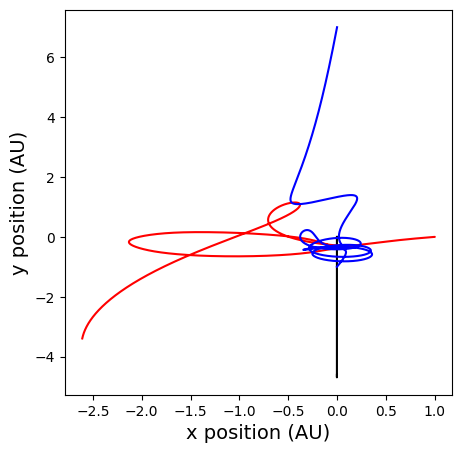

In [223]:
plt.figure(figsize=(5,5))
plt.plot(x1_pos/AU, y1_pos/AU, c="k")
plt.plot(x2_pos/AU, y2_pos/AU, c="r")
plt.plot(x3_pos/AU, y3_pos/AU, c="b")
plt.xlabel("x position (AU)", fontsize=14)
plt.ylabel("y position (AU)", fontsize=14)
# plt.xlim([-1,1])
# plt.ylim([-1,1])
plt.show()